# Basic Operations on Images

In the previous chapter we saw how can we manipulate the image by tuning its pixel intensities. Let's understand some other operations which can be applied to images.

Types of operations we are going to look at in this notebook are: 

- Affine Transformations
  - Translation
  - Rotation
  - Resize
  - Crop
  - Flip
  
  
- Spectral Operations
  - Thresholding
  
  
- Logical Operations
  - Bitwise AND
  - Bitwise OR
  - Bitwise NOT

## Affine Transformation

**Definition**: An affine transformation is any transformation that preserves collinearity (i.e., all points lying on a line initially still lie on a line after transformation) and ratios of distances (e.g., the midpoint of a line segment remains the midpoint after transformation). 
**Reference**: [Wolfram Alpha](https://mathworld.wolfram.com/AffineTransformation.html)

Let's look at how we can perform different transformations using OpenCV.

**Read**: [Geometric Transformations of Images](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html)

### Translation

Shifting each pixel by some positions.

In [5]:
# Importing libraries

import cv2
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [21]:
def rowPlot(images, subtitles, title):
    
    f, ax = plt.subplots(1, len(images), figsize = (5*len(images), 5))
    for i, (x, im) in enumerate(zip(ax, images)):
        x.imshow(im)
        x.set_title(subtitles[i])
        x.axis('off')

    f.suptitle(title)
    plt.show()

E:\Envs\py36tf\lib\site-packages\ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


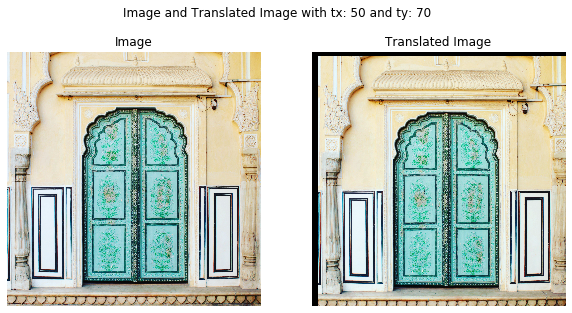

In [22]:
# Translating image using Numpy

image = cv2.cvtColor(cv2.imread('..//assets//images//jaipur-4.jpg'), cv2.COLOR_BGR2RGB)

tx = 50
ty = 70
image_tr = np.zeros(image.shape)

for i in tqdm_notebook(range(tx, image.shape[0])):
    for j in range(ty, image.shape[1]):
        image_tr[i, j, :] = image[i - tx, j - ty, :]

for i in range(3):
    image_tr[:, :, i] = image_tr[:, :, i]/np.max(image_tr[:, :, i])
        
rowPlot([image, image_tr], 
        ['Image', 'Translated Image'], 
        'Image and Translated Image with tx: {} and ty: {}'.format(tx, ty))

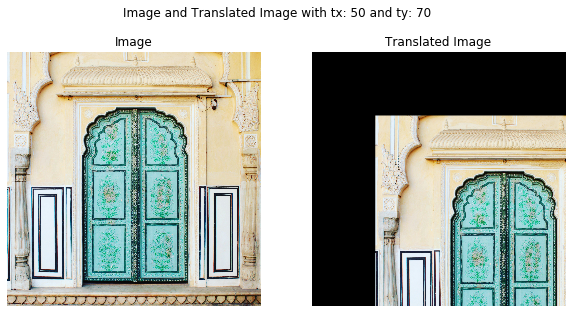

In [23]:
# Translating image using warpAffine Function of OpenCV
# Ref: https://www.geeksforgeeks.org/image-translation-using-opencv-python/

height, width = image.shape[:2] 
  
quarter_height, quarter_width = height / 4, width / 4
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 
  
# We use warpAffine to transform 
# the image using the matrix, T 
image_tr = cv2.warpAffine(image, T, (width, height))

rowPlot([image, image_tr], 
        ['Image', 'Translated Image'], 
        'Image and Translated Image with tx: {} and ty: {}'.format(tx, ty))

### Rotation

Transforming pixels of an image by an angle and with reference to a point. The point of reference can change the output of rotation even if the angle is the same.

**Interesting Read**: [PyImageSearch - Rotate Images Correctly with OpenCV and Python](https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/)

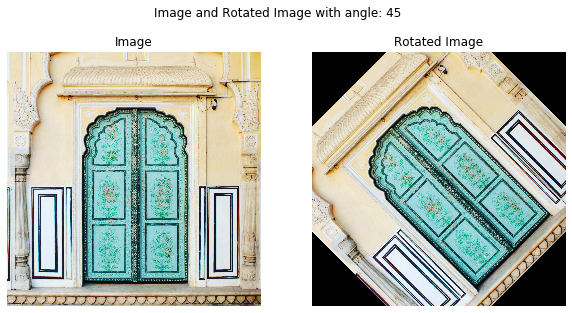

In [24]:
angle = 45
rows = image.shape[0]
cols = image.shape[1]

M = cv2.getRotationMatrix2D((cols/2,rows/2), angle, 1)
image_rt = cv2.warpAffine(image, M, (cols, rows))

rowPlot([image, image_rt], 
        ['Image', 'Rotated Image'], 
        'Image and Rotated Image with angle: {}'.format(angle))

### Resize

Resizing the image is scaling or converting it to a different size. The size can be more or less than the original image. This transformation helps in fitting the image in memory constraints. The new image is generated by interpolating the original one.

**Read**: [Image Resizing Using OpenCV Python](https://www.geeksforgeeks.org/image-resizing-using-opencv-python/)

Image Size (2998, 2997, 3), Smaller Size (300, 300, 3), Custom Size (1610, 1050, 3)


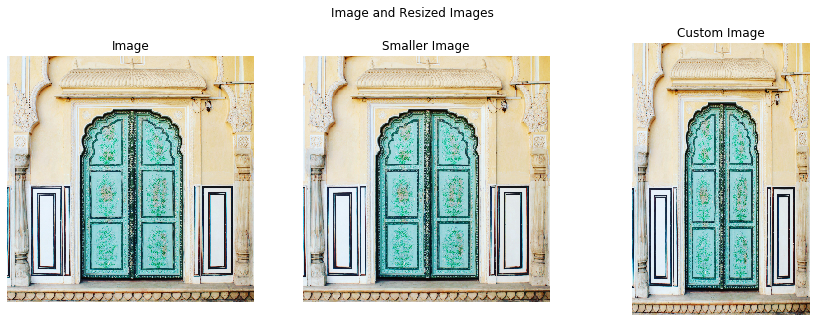

In [31]:
smaller = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1) 
custom = cv2.resize(image, (1050, 1610)) 

print('Image Size {}, Smaller Size {}, Custom Size {}'.format(image.shape,
                                                           smaller.shape,
                                                           custom.shape))

rowPlot([image, half, bigger], 
        ['Image', 'Smaller Image', 'Custom Image'], 
        'Image and Resized Images')

### Crop

Cropping the image is removing an area of the image and only retaining a portion of the image.

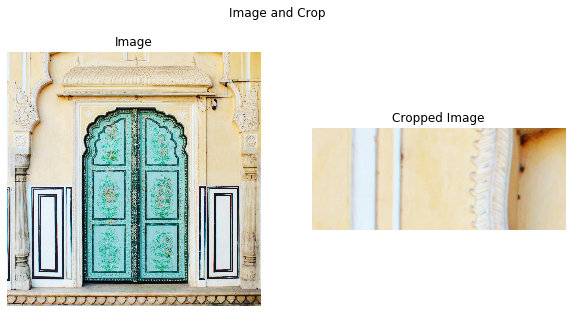

In [38]:
tx = 100
w = 500
ty = 20
h = 200
image_cr = image[ty:ty+h, tx:tx+w]

rowPlot([image, image_cr], 
        ['Image', 'Cropped Image'],
        'Image and Crop
        ')

### Flip

This operation creates a mirror image of an image with respect to a line (horizontal or vertical).

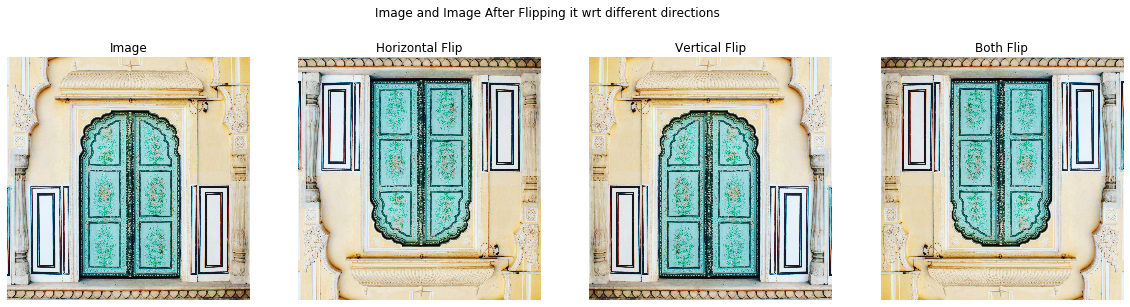

In [39]:
horizontal_img = cv2.flip(image, 0)
vertical_img = cv2.flip(image, 1)
both_img = cv2.flip(image, -1)

rowPlot([image, horizontal_img, vertical_img, both_img], 
        ['Image', 'Horizontal Flip', 'Vertical Flip', 'Both Flip'],
        'Image and Image After Flipping it wrt different directions')

## Spectral Operation

These operation work with the pixel intensities and spectral channels. They do not alter the spatial positions of the pixels but change the intensity levels.

#### Thresholding

Thresholding converts the image into a binary image having two levels of intensities. The divide in the intensitites is created using some condition. Below are some sample of simple thresholding operation.

In [40]:
def simple_thresholding1(img, thr):
    
    img_t = np.where(img >= thr, 255, 0)
    
    return img_t

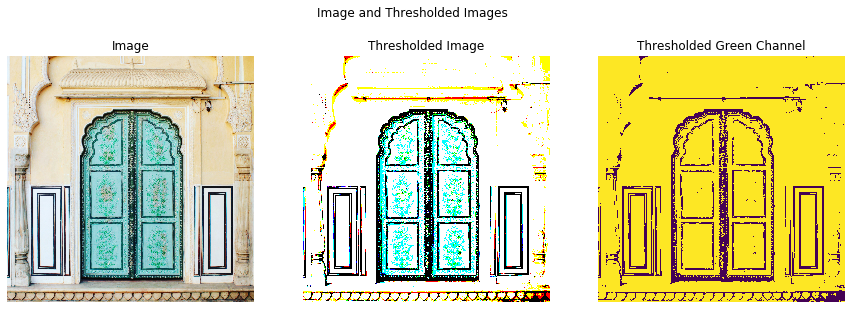

In [43]:
image_tr = simple_thresholding1(image, 123)

rowPlot([image, image_tr, image_tr[:, :, 1]], 
        ['Image', 'Thresholded Image', 'Thresholded Green Channel'], 
        'Image and Thresholded Images')

### Bitwise Operations

These operations are useful for masking images. The masks can be altered using logical operations such AND, OR, NOT.

Let's see some examples.

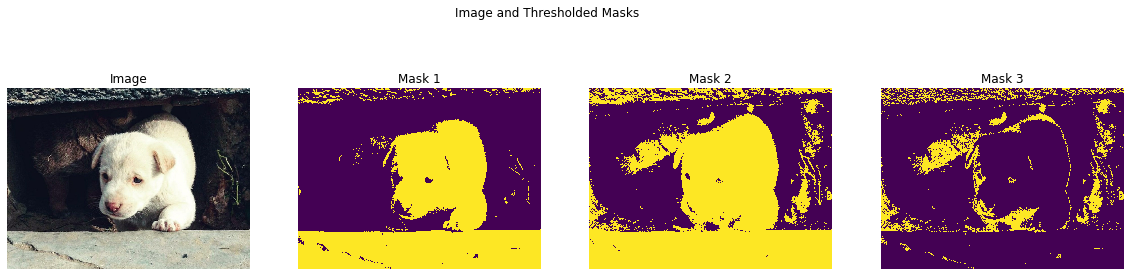

In [64]:
image = cv2.cvtColor(cv2.imread('..//assets//images//babatpur-2.jpg'), cv2.COLOR_BGR2RGB)
mask_1 = simple_thresholding1(image, 123)[:, :, 0]
mask_2 = simple_thresholding1(image, 40)[:, :, 0]
mask_3 = cv2.bitwise_xor(mask_1, mask_2)

rowPlot([image, mask_1, mask_2, mask_3], 
        ['Image', 'Mask 1', 'Mask 2', 'Mask 3'],
        'Image and Thresholded Masks')

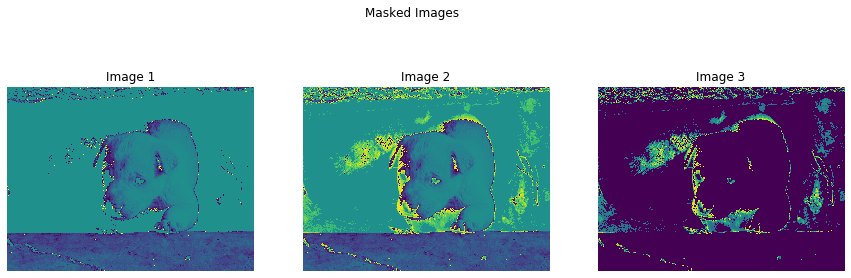

In [75]:
image_1 = cv2.bitwise_and(image[:, :, 0].astype('int8'), image[:, :, 0].astype('int8'), mask = mask_1.astype('int8'))
image_2 = cv2.bitwise_and(image[:, :, 0].astype('int8'), image[:, :, 0].astype('int8'), mask = mask_2.astype('int8'))
image_3 = cv2.bitwise_and(image[:, :, 0].astype('int8'), image[:, :, 0].astype('int8'), mask = mask_3.astype('int8'))

rowPlot([image_1, image_2, image_3], 
        ['Image 1', 'Image 2', 'Image 3'],
        'Masked Images')

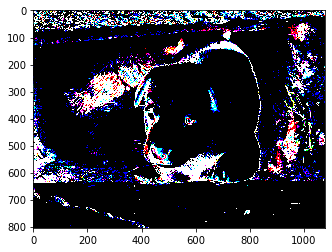

In [57]:
plt.imshow(mask_3)